Following example shows the implementation of eular method for step response of dc motor.

In [19]:
# Import numpy and matplotlib.pyplot library
import numpy as np
import matplotlib.pyplot as plt

Following cell specify Dc motor specification

In [20]:
# DC motor Specification
J = 0.01
B = 0.1
K = 0.1
Rs = 1.0
Ls = 0.5

dcmotor_dynamics : This function will implement motor dynamics using Eular method
Input of Funciton : 1. time step
                    2. state  : Dc motor has two state parameters. 
                        a) Stator current - IS
                        b) Motor Speed    - omega
                    3. Motor input : ref_voltage and load torque

Output of Function : new motor state Is and omega

In [21]:
def dcmotor_dynamics(dt,state,motor_input):
    # State variables
    Is, omega = state
    V,Tl = motor_input

    Is_dt = (V - Rs * Is - omega* K) / Ls
    # Electromagnetic torque
    Te = K * Is
    # Mechanical dynamics
    domega_dt = (Te - Tl - B * omega) / J
    # New State
    Is = Is + Is_dt*dt
    omega = omega + domega_dt*dt
        
    return [Is,omega]

Following code create array for time and motor state (Is,omega)
Here simulation_time and time_step are 3 and 1e-6 seconds.

In [22]:
# Simulation parameters
#Time Input
simulation_time = 2
time_step = 1e-6

#generate time array
t_span = (0, simulation_time)  # Simulation time
dt = time_step  # Time step
t_eval=np.arange(0, t_span[1], dt)

# Initial conditions [Is, omega]
state0 = [0, 0]  

# np array for data ouput
time_len=len(t_eval)
Is=np.zeros(time_len)
omega=np.zeros(time_len)

Following code interatively calculates new state of motor with dcmotor_dynamics funciton 

In [23]:
# Reference Input Voltage 1 V and load torque
ref_V=1
Tl=0
# motor input
motor_input=[ref_V,Tl]

index=0
for t in t_eval[:(time_len-1)]:
    # Ref Input ref_V and Tl=0
    motor_input=[ref_V,0]

    #solving using eular method
    [new_Is,new_omega]=dcmotor_dynamics(dt,state0,motor_input)
    
    # assign new state and store result in nparray
    state0=[new_Is,new_omega]

    #store new state in array
    Is[index+1]= new_Is
    omega[index+1]=new_omega
    
    # increment 
    index=index+1

Plotting Graph

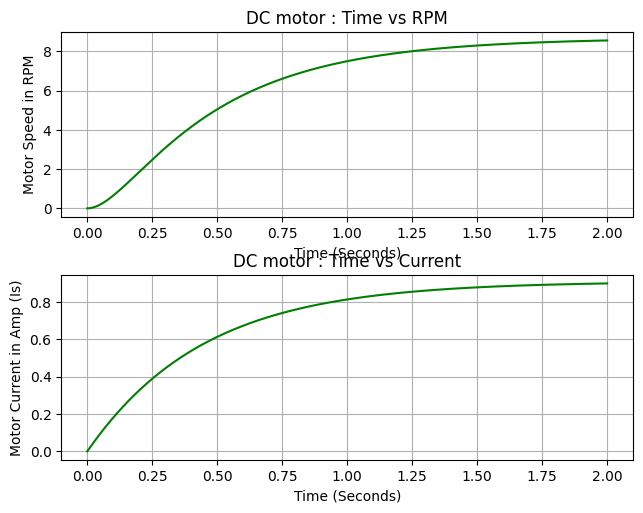

In [24]:
#plot Graph Time Vs RPM/Current
plt.figure(1)
plt.subplot(2,1,1)
plt.plot(t_eval, omega*60/(2*np.pi), label='omega in rpm', color="g")
plt.xlabel("Time (Seconds)")
plt.ylabel("Motor Speed in RPM")
plt.title("DC motor : Time vs RPM")
plt.grid()

plt.tight_layout()

plt.subplot(2,1,2)
plt.plot(t_eval, Is, label='Current', color="g")
plt.xlabel("Time (Seconds)")
plt.ylabel("Motor Current in Amp (Is)")
plt.title("DC motor : Time vs Current")
plt.grid()
plt.show()
